
# Figure S6

22-02-21

Katie Willis

katie.willis16@imperial.ac.uk

In [ ]:
] activate

In [2]:
using NBInclude
@nbinclude("Setup.ipynb");
using Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
#Load evolutionary stability model
@nbinclude("DoubleDrive_Simulator_EvoStability.ipynb");

In [5]:
#Assign plotting parameters
PyPlot.rc("font", family="Arial")
PyPlot.rc("xtick", labelsize=10) 
PyPlot.rc("ytick", labelsize=10) 

blue = "#0155FF"
light_blue = "#78A0FF"
red = "#FF011A"
light_red = "#FF7689"
col1 = "#BA03FF" #purple
col2 = "#FF8509" #orange
col3 = "#FF6CE8" #pink
col4 = "#FFBF09" #yellow
col5 = "#00DF97" #green

"#00DF97"

### Simulations

In [6]:
#Define design 3
LOCUS_A = "neutral"
LOCUS_B = "HS_rec"
set_A_homing_dependency = "constitutive"
set_B_homing_dependency = "conditional"
set_XS_dependency = "constitutive_B"
A_alleles_content,A_alleles_ir = Make_construct_content_dict("A",["cas9","Agrna"],false)
B_alleles_content,B_alleles_ir = Make_construct_content_dict("B",["Bgrna","xs"],false)
fitness_effect = "adult"

#Assign parameters
params = Assign_baseline_params(LOCUS_A,
                                LOCUS_B,
                                set_A_homing_dependency,
                                set_B_homing_dependency,
                                set_XS_dependency)

#Assign mutation probability of each transcriptonal unit
d_ = 0.001
params["daf"] = d_
params["dam"] = d_
params["dbf"] = d_
params["dbm"] = d_

transgenic_genotype = ["A1" "A2"; "B1" "B2"]
release_freq = 0.001
resistant_allele = "A5"
resistant_freq = 0.01

t=1000

data_dict_3 = Simulation_wrapper(params,
                            A_alleles_content,
                            A_alleles_ir,
                            B_alleles_content,
                            B_alleles_ir,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq,
                            resistant_allele, 
                            resistant_freq,
                            t);

In [7]:
#Define design 4
LOCUS_A = "neutral"
LOCUS_B = "HS_rec"
set_A_homing_dependency = "conditional"
set_B_homing_dependency = "conditional"
set_XS_dependency = "constitutive_B"
A_alleles_content,A_alleles_ir = Make_construct_content_dict("A",["cas9"],false)
B_alleles_content,B_alleles_ir = Make_construct_content_dict("B",["Bgrna","xs","Agrna"],false)
fitness_effect = "adult"

#Assign parameters
params = Assign_baseline_params(LOCUS_A,
                                LOCUS_B,
                                set_A_homing_dependency,
                                set_B_homing_dependency,
                                set_XS_dependency)

d_ = 0.001
params["daf"] = d_
params["dam"] = d_
params["dbf"] = d_
params["dbm"] = d_

transgenic_genotype = ["A1" "A2"; "B1" "B2"]
release_freq = 0.001
resistant_genotype = "A3"
resistant_freq = 0.01

t=1000

data_dict_4 = Simulation_wrapper(params,
                            A_alleles_content,
                            A_alleles_ir,
                            B_alleles_content,
                            B_alleles_ir,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq,
                            resistant_genotype, 
                            resistant_freq,
                            t);

In [8]:
#Define design 5
LOCUS_A = "neutral"
LOCUS_B = "HI"
set_A_homing_dependency = "conditional"
set_B_homing_dependency = "constitutive"
set_XS_dependency = "constitutive_A"
A_alleles_content,A_alleles_ir = Make_construct_content_dict("A",["Agrna","xs"],false)
B_alleles_content,B_alleles_ir = Make_construct_content_dict("B",["cas9","Bgrna"],false)
fitness_effect = "adult"

#Assign parameters
params = Assign_baseline_params(LOCUS_A,
                                LOCUS_B,
                                set_A_homing_dependency,
                                set_B_homing_dependency,
                                set_XS_dependency)

d_ = 0.001
params["daf"] = d_
params["dam"] = d_
params["dbf"] = d_
params["dbm"] = d_

transgenic_genotype = ["A1" "A2"; "B1" "B2"]
release_freq = 0.001
resistant_genotype = "A5"
resistant_freq = 0.01

t=1000

data_dict_5 = Simulation_wrapper(params,
                            A_alleles_content,
                            A_alleles_ir,
                            B_alleles_content,
                            B_alleles_ir,
                            fitness_effect,
                            transgenic_genotype,
                            release_freq,
                            resistant_genotype, 
                            resistant_freq,
                            t);

### Figure

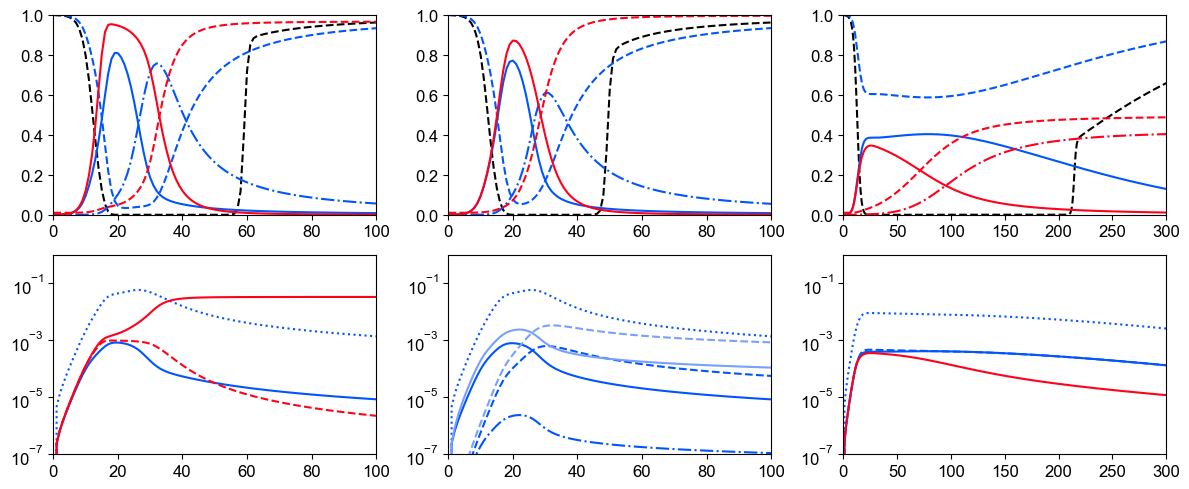

In [9]:
#PLOT

PyPlot.rc("font", family="Arial")
PyPlot.rc("xtick", labelsize=12) 
PyPlot.rc("ytick", labelsize=12) 

f1, axes = PyPlot.subplots(2,3,figsize=(12,5),frameon=false,sharex=false,sharey=false)
t=1000
t_display = 100
n=0

#_______________
#
#DESIGN 3
#_______________
n=n+1
output=data_dict_3
axes[n].plot(0:t,output["relative_number_females"].adult,c="black","--", label = "Females")
axes[n].plot(0:t,output["allelefreq_zygote"].B2,c=blue,"-",label = "α")
axes[n].plot(0:t,output["allelefreq_zygote"].B4,c=blue,"-.",label = "α-XS") #XS defector
axes[n].plot(0:t,output["allelefreq_zygote"].B1,c=blue,"--",label = "A")
axes[n].plot(0:t,output["allelefreq_zygote"].A2,c=red,"-",label = "β")
axes[n].plot(0:t,output["allelefreq_zygote"].A5,c=red,"--",label = "b")
axes[n].set_xlim([0,t_display])
axes[n].set_ylim([0,1])

n=n+1
axes[n].plot(0:t,output["allelefreq_zygote"].B5,c=blue,":",label = "a")
axes[n].plot(0:t,output["allelefreq_zygote"].B3,c=blue,"-",label = "α-gRNA\$_A\$")
axes[n].plot(0:t,output["allelefreq_zygote"].A3,c=red,"-",label = "β-Cas9")
axes[n].plot(0:t,output["allelefreq_zygote"].A4,c=red,"--",label = "β-gRNA\$_B\$")
axes[n].set_xlim([0,t_display])
axes[n].set_ylim([10^-7,1])
axes[n].set_yscale("log")

#_______________
#
#DESIGN 4
#_______________
n=n+1
output=data_dict_4
axes[n].plot(0:t,output["relative_number_females"].adult,c="black","--", label = "Females")
axes[n].plot(0:t,output["allelefreq_zygote"].B2,c=blue,"-",label = "α")
axes[n].plot(0:t,output["allelefreq_zygote"].B4,c=blue,"-.",label = "α-XS")#XS defector
axes[n].plot(0:t,output["allelefreq_zygote"].B1,c=blue,"--",label = "A")
axes[n].plot(0:t,output["allelefreq_zygote"].A2,c=red,"-",label = "β")
axes[n].plot(0:t,output["allelefreq_zygote"].A3,c=red,"--",label = "b")
axes[n].set_xlim([0,t_display])
axes[n].set_ylim([0,1])

n=n+1
axes[n].plot(0:t,output["allelefreq_zygote"].B9,c=blue,":",label = "a")
axes[n].plot(0:t,output["allelefreq_zygote"].B3,c=blue,"-",label = "α-gRNA\$_A\$")
axes[n].plot(0:t,output["allelefreq_zygote"].B6,c=blue,"--",label = "α-gRNA\$_A\$-XS")
axes[n].plot(0:t,output["allelefreq_zygote"].B5,c=light_blue,"-",label = "α-gRNA\$_B\$")
axes[n].plot(0:t,output["allelefreq_zygote"].B8,c=light_blue,"--",label = "α-gRNA\$_B\$-XS")
axes[n].plot(0:t,output["allelefreq_zygote"].B7,c=blue,"-.",label = "α-gRNA\$_A\$-gRNA\$_B\$")
axes[n].set_xlim([0,t_display])
axes[n].set_ylim([10^-7,1])
axes[n].set_yscale("log")

#_______________
#
#DESIGN 5
#_______________
n=n+1
output=data_dict_5
t_display = 300
axes[n].plot(0:t,output["relative_number_females"].adult,c="black","--", label = "Females")
axes[n].plot(0:t,output["allelefreq_zygote"].B2,c=blue,"-",label = "α")
axes[n].plot(0:t,output["allelefreq_zygote"].B1,c=blue,"--",label = "A")
axes[n].plot(0:t,output["allelefreq_zygote"].A2,c=red,"-",label = "β")
axes[n].plot(0:t,output["allelefreq_zygote"].A4,c=red,"-.",label = "β-XS")#XS defector
axes[n].plot(0:t,output["allelefreq_zygote"].A5,c=red,"--",label = "b")
axes[n].set_xlim([0,t_display])
axes[n].set_ylim([0,1])

n=n+1
axes[n].plot(0:t,output["allelefreq_zygote"].B5,c=blue,":",label = "a")
axes[n].plot(0:t,output["allelefreq_zygote"].B4,c=blue,"-",label = "α-gRNA\$_A\$")
axes[n].plot(0:t,output["allelefreq_zygote"].B3,c=blue,"--",label = "α-Cas9")
axes[n].plot(0:t,output["allelefreq_zygote"].A3,c=red,"-",label = "β-gRNA\$_B\$")
axes[n].set_xlim([0,t_display])
axes[n].set_ylim([10^-7,1])
axes[n].set_yscale("log")

PyPlot.tight_layout()
PyPlot.show()

PyPlot.rc("font", family="Arial")
PyPlot.rc("xtick", labelsize=10) 
PyPlot.rc("ytick", labelsize=10) 